<a href="https://colab.research.google.com/github/kgdtop/test2/blob/main/Segmentation_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br> ======== 
<br> Initial: Jong-Min Kim, Ph. D., 24-April-2020
<br> ======== 
<br> Modified: Jong-Min Kim, Ph. D., 15-June-2020

## Preparation

In [ ]:
!pip install SimpleITK
!pip install runstats
!pip install tensorboardX

     |████████████████████████████████| 44.9MB 127kB/s 
     |████████████████████████████████| 112kB 4.2MB/s 
  Created wheel for runstats: filename=runstats-1.8.0-cp36-cp36m-linux_x86_64.whl size=200039 sha256=8542e858470673a42c7eb61c01aeec35724efc58404ce6b51a60aef0fdaba065
  Stored in directory: /root/.cache/pip/wheels/58/f0/2b/509c185283b7a501bcad14d5ab99fd614c80dcb1f894897d0e
Successfully built runstats
     |████████████████████████████████| 317kB 5.8MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!python '/content/gdrive/My Drive/WIP/EIEN-2020-Fall/EIEN394/Lecture_for_me/Lecture 17 - Exp/Toy code for segmentation/Segmentation_using_DL/Segm_DL_playground-master_v3/train.py' --num-pools 6 --num-chans 8 --accel_method 'gpu' --batch-size 1 --num-epoch 10 --data-path '/content/gdrive/My Drive/WIP/EIEN-2020-Fall/EIEN394/Lecture_for_me/Lecture 17 - Exp/Toy code for segmentation/TrainingData_Splitted' --drop-prob 0.1 --exp-dir '/content/gdrive/My Drive/WIP/EIEN-2020-Fall/EIEN394/Lecture_for_me/Lecture 17 - Exp/Toy code for segmentation/Segmentation_using_DL/ckt' 

INFO:root:Namespace(InChans=1, OutChans=2, accel_method='gpu', batch_size=1, checkpoint=None, data_parallel=False, data_path=PosixPath('/content/gdrive/My Drive/WIP/EIEN-2020-Fall/EIEN394/Lecture_for_me/Lecture 17 - Exp/Toy code for segmentation/TrainingData_Splitted'), device='cuda', drop_prob=0.1, exp_dir=PosixPath('/content/gdrive/My Drive/WIP/EIEN-2020-Fall/EIEN394/Lecture_for_me/Lecture 17 - Exp/Toy code for segmentation/Segmentation_using_DL/ckt'), lr=0.0005, lr_gamma=0.1, lr_step_size=10, naming='PROMISE12_h5', network_model='unet', num_cascades=5, num_chans=8, num_epochs=10, num_pools=6, report_interval=50, resolution=256, resume=False, sample_rate=1.0, seed=42, weigh_L1=0, weigh_L_BCE=1, weigh_L_dice=0, weight_decay=0.0)
INFO:root:build_model(
  (model): UnetModel(
    (down_sample_layers): ModuleList(
      (0): ConvBlock(in_chans=1, out_chans=8, drop_prob=0.1)
      (1): ConvBlock(in_chans=8, out_chans=16, drop_prob=0.1)
      (2): ConvBlock(in_chans=16, out_chans=32, drop_p

## val

In [ ]:
!python '/content/gdrive/My Drive/WIP/EIEN-2020-Fall/EIEN394/Lecture_for_me/Lecture 17 - Exp/Toy code for segmentation/Segmentation_using_DL/Segm_DL_playground-master_v3/test.py' --data-path '/content/gdrive/My Drive/WIP/EIEN-2020-Fall/EIEN394/Lecture_for_me/Lecture 17 - Exp/Toy code for segmentation/TrainingData_Splitted' --data-split val --checkpoint '/content/gdrive/MyDrive/WIP/EIEN-2020-Fall/EIEN394/Lecture_for_me/Lecture 17 - Exp/Toy code for segmentation/Segmentation_using_DL/ckt/2020_11_17_00_56_44/best_model.pt' --out-dir '/content/gdrive/My Drive/WIP/EIEN-2020-Fall/EIEN394/Lecture_for_me/Lecture 17 - Exp/Toy code for segmentation/Segmentation_using_DL/out_dir'

## Visualization

In [ ]:
import h5py
import numpy as np
from matplotlib import pyplot as plt


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


Keys: ['reconstruction']
Attrs: {}
shape of current_img (24, 1, 256, 256) int64


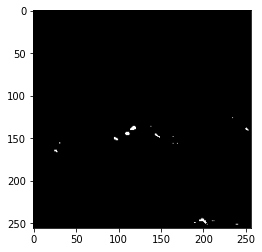

In [ ]:
file = '/content/gdrive/MyDrive/WIP/EIEN-2020-Fall/EIEN394/Lecture_for_me/Lecture 17 - Exp/Toy code for segmentation/Segmentation_using_DL/out_dir/2020_11_17_01_20_28/PROMISE12_val_data_41.h5'
hf = h5py.File(file)
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))
current_img = hf['reconstruction'][()]
print('shape of current_img', current_img.shape, current_img.dtype)
plt.figure()
plt.imshow(np.abs(current_img[7,0,:,:]), cmap='gray')
#plt.savefig('/content/gdrive/My Drive/WIP/pytorch code - unsMBTR/code_maskgen_v1/fig1.png', dpi=300)